# Algorithm optimization & testing

This notebook demonstrates performance testing of four different algorithm implementations which perform the same operation: removing even numbers from a list.

## Notebook set-up

In [1]:
import sys
import time
import random
import statistics
from typing import Callable

import numpy as np
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

print(f'Recursion depth limit {sys.getrecursionlimit()}')

Recursion depth limit 3000


## 1. Algorithm implementations

Four functions to remove even numbers using: a loop, Numpy, list comprehension and recursion.

In [2]:
# Loop implementation
def loop_remove_evens(nums: list) -> list:
    '''Removes even numbers from a list by looping over the
    list, checking each element and collecting the odd ones.'''

    evens=[]

    for num in nums:
        if num %2 != 0:
            evens.append(num)

    return evens

# Numpy implementation
def numpy_remove_evens(nums: list) -> list:
    '''Removes even numbers from list using NumPy.'''

    nums=np.array(nums)

    return nums[nums % 2 != 0]

# List comprehension implementation
def list_comp_remove_evens(nums: list) -> list:
    '''Removes even numbers from list using list comprehension.'''

    return [x for x in nums if x % 2 !=0]

# Recursive implementation
def recursive_remove_even(nums: list) -> list:
    '''Uses recursion to remove even numbers from list.'''

    if not nums:
        return []
    elif nums[0] % 2 == 0:
        return recursive_remove_even(nums[1:])
    else:
        return [nums[0]] + recursive_remove_even(nums[1:])


nums=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(f'Loop results: {loop_remove_evens(nums)}')
print(f'Numpy result: {numpy_remove_evens(nums)}')
print(f'List comprehension result: {list_comp_remove_evens(nums)}')
print(f'Recursion result: {recursive_remove_even(nums)}')

Loop results: [1, 3, 5, 7, 9]
Numpy result: [1 3 5 7 9]
List comprehension result: [1, 3, 5, 7, 9]
Recursion result: [1, 3, 5, 7, 9]


All four functions give the same result - but are they equivalent?

## 2. Algorithm implementation testing

Let's exclude the recursive version from testing. It is an interesting solution, but much, much less efficient in both time and space than the other three.

In [3]:
n=500       # Number of trials to run
k=10000000  # Number of random integers to use
start=1000  # Start of range for random test ints
end=1000000 # End of range for random test ints

# Functions to test
implementations=['Loop', 'NumPy', 'List comprehension']
functions=[loop_remove_evens, numpy_remove_evens, list_comp_remove_evens]

# Helper function to measure execution time
def measure_execution_time(function: Callable, nums: list) -> float:
    '''Measures execution time of remove evens function. Returns results as float seconds.'''

    start=time.time()
    function(nums)
    return time.time() - start

# Helper function to measure memory footprint
def measure_memory_footprint(function: Callable, nums: list) -> float:
    '''Measure memory footprint of remove evens function. Returns result as float MB.'''

    mem_usage=memory_usage((function, (nums,)))
    return max(mem_usage)

### 2.1. Memory footprint measurement

Run memory usage test with n replicates of k numbers each.

In [4]:
# Dictionary of empty lists to collect results
memory_results=dict(zip(implementations, [[],[],[]]))

# Collet n memory use measurements with different random lists
for trial in range(n):

    # Generate some random integers for this trial
    random_list=random.choices(list(range(start,end)), k=k)

    # Measure memory footprint for each implementation
    for implementation, function in zip(implementations, functions):
        max_memory=measure_memory_footprint(function, random_list)
        memory_results[implementation].append(max_memory)

### 2.2. Execution time measurement

Run execution time test with n replicates of k numbers each.

In [5]:
# Dictionary of empty lists to collect results
time_results=dict(zip(implementations, [[],[],[]]))

# Collet n execution time measurements for each function with different random lists
for trial in range(n):

    # Generate some random integers for this trial
    random_list=random.choices(list(range(0,100)), k=k)

    # Measure execution time for each function on the random integer list
    for implementation, function in zip(implementations, functions):
        max_memory=measure_execution_time(function, random_list)
        time_results[implementation].append(max_memory)

### 2.3. Results

Use a histogram to plot the results for each trial of each function implementation.

Loop
NumPy
List comprehension


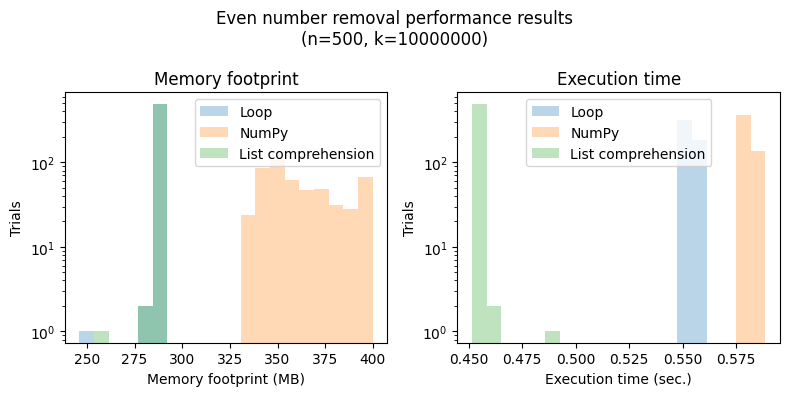

In [6]:
# Calculate common memory and time bins across each function implementation
_, memory_bins=np.histogram(sum(memory_results.values(), []), bins=20)
_, time_bins=np.histogram(sum(time_results.values(), []), bins=20)

# Set-up a 1x2 plot for memory and time results
fig, axs=plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle(f'Even number removal performance results\n(n={n}, k={k})')
axs=axs.flatten()

# Draw the memory plot
for implementation, data in memory_results.items():
    axs[0].hist(data, bins=memory_bins, alpha=0.3, label=implementation)

axs[0].set_title('Memory footprint')
axs[0].set_xlabel('Memory footprint (MB)')
axs[0].set_ylabel('Trials')
axs[0].set_yscale('log')
axs[0].legend(loc='best')

# Draw the time plot
for implementation, data in time_results.items():
    axs[1].hist(data, bins=time_bins, alpha=0.3, label=implementation)
    print(implementation)

axs[1].set_title('Execution time')
axs[1].set_xlabel('Execution time (sec.)')
axs[1].set_ylabel('Trials')
axs[1].set_yscale('log')
axs[1].legend(loc='upper center')

plt.tight_layout()
plt.show()

The loop and the list comprehension have the same memory footprint. NumPy uses the most memory over all, and has a large variability in memory requirement relative to the other implementations. The list comprehension is the fastest implementation, NumPy and the naive loop are around a tenth of a second slower with an input size of 10,000,000.

## 4. Time complexity measurement

### 4.1. Execution time as a function of input size

Time the execution of n trials on k integers, this time using increasing input list sizes.

In [7]:
# List of test input lengths using powers of 2
input_lengths=[2**j for j in range(15,21)]

# Dictionaries of empty lists to collect means and standard deviations
# of time results for each function implementation
means=dict(zip(implementations, [[],[],[]]))
stdevs=dict(zip(implementations, [[],[],[]]))

# Loop over the input number list lengths
for input_length in input_lengths:

    # Dictionary of empty lists to collect times for this input length
    time_results=dict(zip(implementations, [[],[],[]]))

    # Collet n speed measurements with different random lists
    for trial in range(n):

        # Generate some random integers for this trial
        random_list=random.choices(list(range(start,end)), k=input_length)

        # Measure execution time for each function on the random integer list
        for implementation, function in zip(implementations, functions):
            max_memory=measure_execution_time(function, random_list)
            time_results[implementation].append(max_memory)

    # Collect mean and standard deviation of execution times for each function
    # for this input length
    for implementation in implementations:
        means[implementation].append(statistics.mean(time_results[implementation]))
        stdevs[implementation].append(statistics.stdev(time_results[implementation]))

### 4.2. Results

Plot the results using a line for the mean and a shaded region for mean +/- standard deviation of each function implementation.

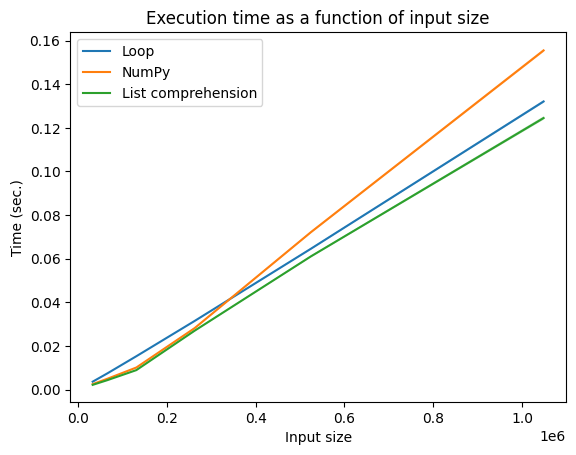

In [8]:
plt.title('Execution time as a function of input size')

# Loop to plot each function implementation
for implementation in implementations:

    # Plot means
    plt.plot(input_lengths, means[implementation], label=implementation)

    # Plot shaded region for +/- one standard deviation from the mean
    plt.fill_between(
        input_lengths,
        np.array(means[implementation])+np.array(stdevs[implementation]),
        np.array(means[implementation])-np.array(stdevs[implementation]),
        alpha=0.3
    )

plt.xlabel('Input size')
plt.ylabel('Time (sec.)')
plt.legend(loc='best')
plt.show()

List comprehension wins over the numpy or naive loop implementation. All three appear to be approximately O(n) - doubling the input list size roughly doubles the execution time. This makes sense - any algorithm that removes even numbers from a list must look at each number at least once. Likely the only way to speed this task up further is to parallelize it, i.e. break the data into chunks and use multiple concurrent processes to remove the even numbers from each chunk at the same time. However, even this overkill approach will still be O(n) - doubling the input size will still approximately double the run time.